#### Notebook Contents :
1. Dataset Information

2. Exploratory Data Analysis (EDA)
       2.1. Automated EDA(Pandas Profiling)
       2.2. Manually performing EDA with Observations

### 1. Dataset Information

In [1]:
#importing the common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the dataset
df = pd.read_csv(r'D:\dsap class\project\TELECOM CHURN\data\WA_Fn_UseC_Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 2. Exploratory Data Analysis

####           2.1 Automated EDA (Pandas Profiling)

In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report')
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### 2.2 Performing EDA 

In [6]:
#checking how many rows and columns are present
df.shape

(7043, 21)

In [7]:
#getting to know the column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
for col in df.columns:
    print(col, ":", len(df[col].unique()),'labels')

customerID : 7043 labels
gender : 2 labels
SeniorCitizen : 2 labels
Partner : 2 labels
Dependents : 2 labels
tenure : 73 labels
PhoneService : 2 labels
MultipleLines : 3 labels
InternetService : 3 labels
OnlineSecurity : 3 labels
OnlineBackup : 3 labels
DeviceProtection : 3 labels
TechSupport : 3 labels
StreamingTV : 3 labels
StreamingMovies : 3 labels
Contract : 3 labels
PaperlessBilling : 2 labels
PaymentMethod : 4 labels
MonthlyCharges : 1585 labels
TotalCharges : 6531 labels
Churn : 2 labels


In [9]:
#creating a function to create a table that has feature_name, dtype, missing values and the number of unique values
def insights_table(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Feature_name'] = summary['index']
    summary = summary[['Feature_name','dtypes']]
    summary['Missing_values'] = df.isnull().sum().values    
    summary['No. Uniques_values'] = df.nunique().values
    return summary
insights_table(df)

,Feature_name,dtypes,Missing_values,No. Uniques_values
0,customerID,object,0,7043
1,gender,object,0,2
2,SeniorCitizen,int64,0,2
3,Partner,object,0,2
4,Dependents,object,0,2
5,tenure,int64,0,73
6,PhoneService,object,0,2
7,MultipleLines,object,0,3
8,InternetService,object,0,3
9,OnlineSecurity,object,0,3


#### Observation: Missing Data - Initial Intuition
Here, we don't have any missing data.

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Observation from the descriptive statiistics
* Senior citizen column is the form of 0's and 1's, here the distribution is not proper
* Tenure :
-->Average tenure is around less than 32 months
-->25% customers have a tenure of less than 9 months
-->50% customers have a tenure of less than 29 months
-->75% customers have a tenure of less than 55months
-->maximum customers have a tenure of less than 72months
* Monthly Charges : 
-->Average monthly charges is USD 64.76 


The dataset has too many features with text data and are probably categorical features.


Removing customer ID, as it is unique to every record.

In [11]:
#df.drop(columns = ['customerID'], inplace = True)

Understanding the Target variable

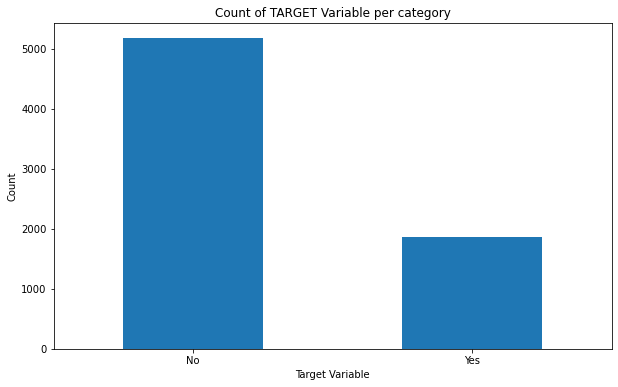

In [12]:
df['Churn'].value_counts().plot.bar(figsize=(10, 6), rot = 0)
plt.ylabel("Count")
plt.xlabel("Target Variable")
plt.title("Count of TARGET Variable per category");

In [13]:
(df['Churn'].value_counts()/len(df['Churn']))*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

#### Observation:
We see that our target variables are imbalanced(73%:27% ratio)

#### Univariate Analysis wrt Churn

In [14]:
df1 = df.drop(columns = ['customerID','Churn','TotalCharges', 'MonthlyCharges','tenure'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

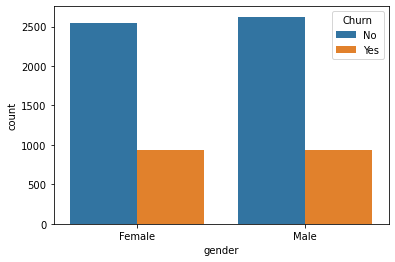

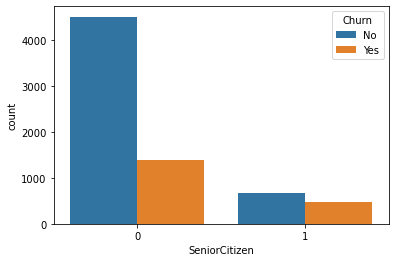

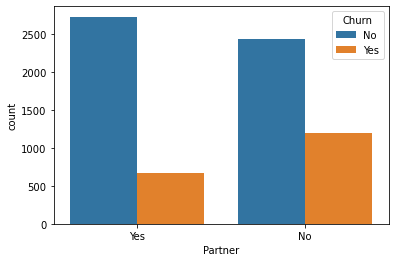

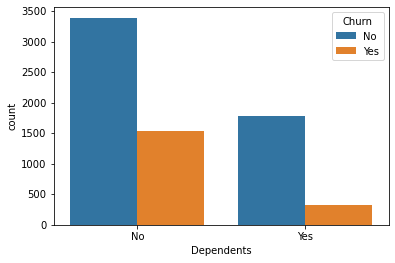

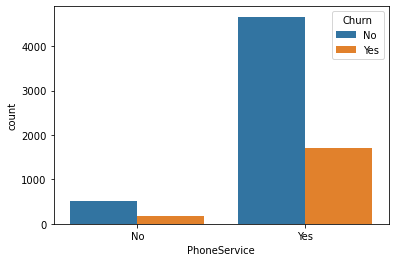

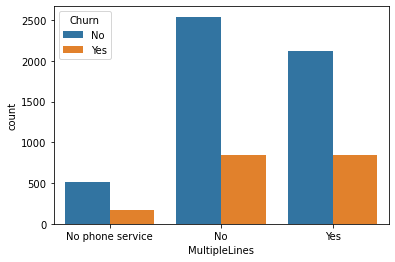

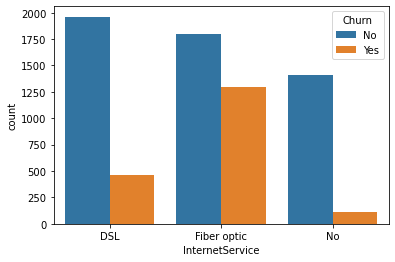

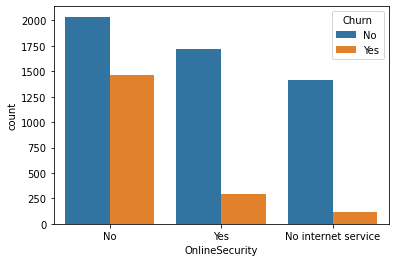

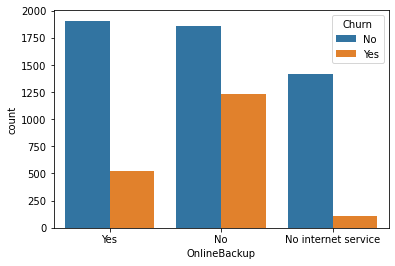

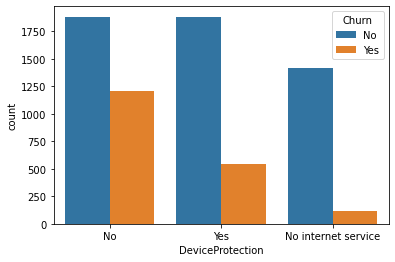

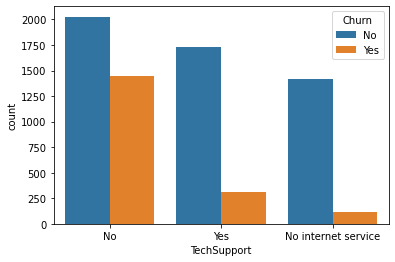

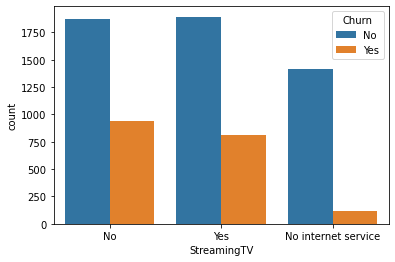

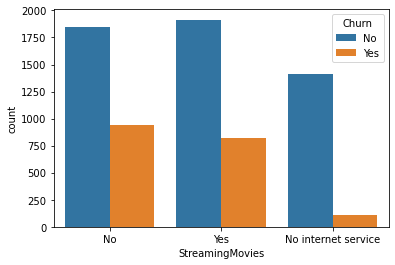

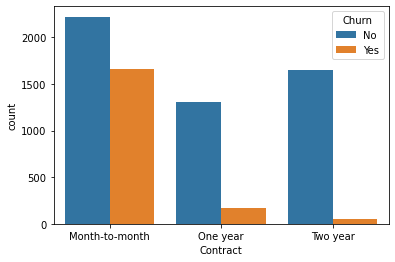

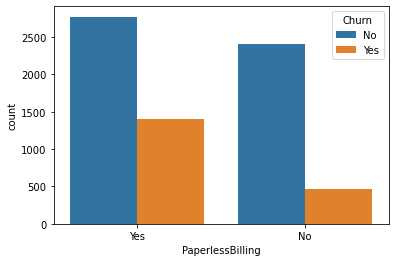

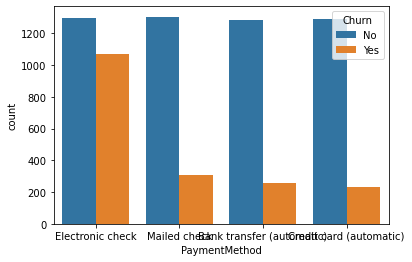

In [15]:
for i in df1:
    plt.figure(i)
    sns.countplot(data=df, x = i, hue='Churn')

In [16]:
new_df = df.copy(deep = True)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

new_df = df.copy(deep = True)
text_data_features = [i for i in list(df.columns) if i not in list(df.describe())]
text_data_features.remove('TotalCharges')
text_data_features.remove('customerID')
# removing TotalCharges here because it is a float varible but given as object, so we shouldnt do label encoding for it

print('Label Encoder Transformation\n')
for i in text_data_features :
    new_df[i] = le.fit_transform(new_df[i])
    print(i,' : ',new_df[i].unique(),' = ',le.inverse_transform(new_df[i].unique()))

Label Encoder Transformation

gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [18]:
#viewing the new dataframe after label encoding
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


#### Group 1 : Customer Information wrt Churn
gender, SeniorCitizen, Partner, Dependents

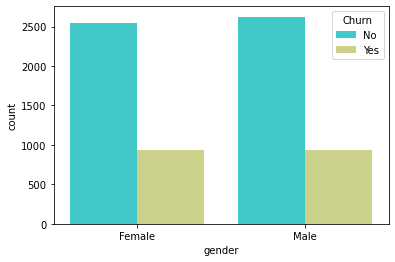

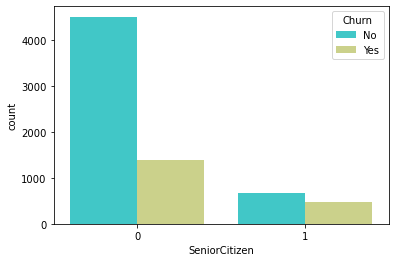

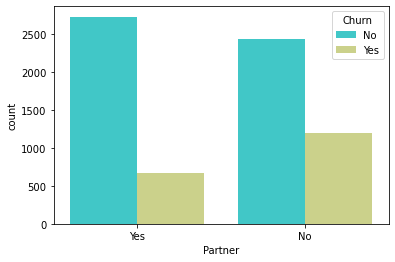

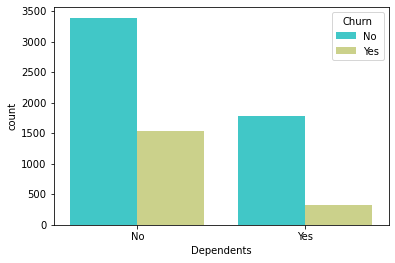

In [19]:
l1 = df[['gender','SeniorCitizen','Partner','Dependents']]
for i in l1:
    plt.figure(i)
    sns.countplot(data=df, x = i, hue='Churn',palette = 'rainbow')

##### Observations:
1. Customer churning for male & female customers is very similar to each other.
2. Similarly, Customer churning for SeniorCitizen customers is pretty low.
3. Customers who living with a Partner churned less as compared to those not living with a Partner.
4. Churning is high for the customers that don't have Dependents with them.

#### Group 1 : Customer Information wrt only customers likely to churn(churn == yes/1)
gender, SeniorCitizen, Partner, Dependents

In [20]:
# Customer Information
gender = new_df[new_df['Churn'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male

seniorcitizen = new_df[new_df['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes

partner = new_df[new_df['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes

dependents = new_df[new_df['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes

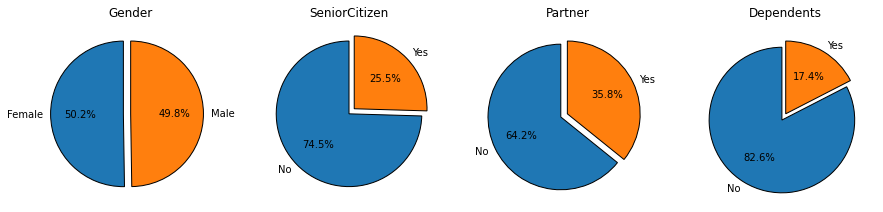

In [21]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender');

plt.subplot(1,4,2)
plt.pie(seniorcitizen,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen');

plt.subplot(1,4,3)
plt.pie(partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner');

plt.subplot(1,4,4)
plt.pie(dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');

##### Observations:
1. We can observe a clear cut 50% - 50% split between the male and female customers that have switched their services.
2. 75% of the churned customers are not SeniorCitizen! This is a major info that the company needs to divert it's attention towards
3. Customers living without a partner have cutoff the services.
4. Customers living without a dependent have cutoff the services.
5. From Partners & Dependents data, average of ((64.2+82.6)/2)=73.4% of customers who were living by themselves have churned out.

#### Group 2: Services Subscribed by the Customer wrt Churn
PhoneService, MultipleLines, InternetService, StreamingTV, StreamingMovies, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport

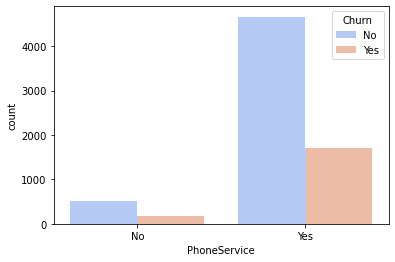

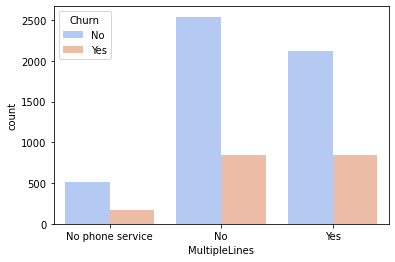

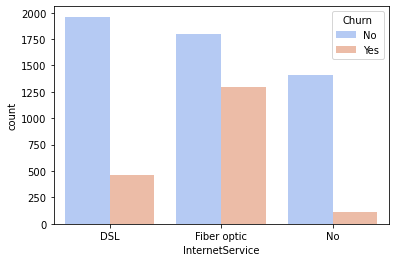

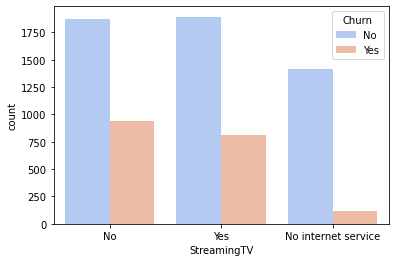

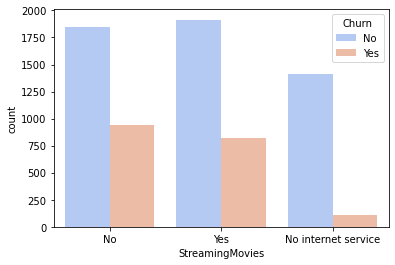

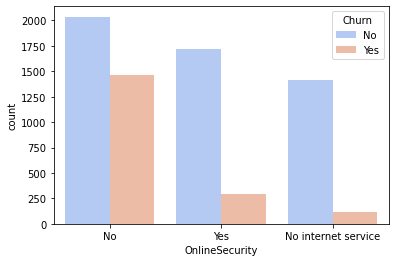

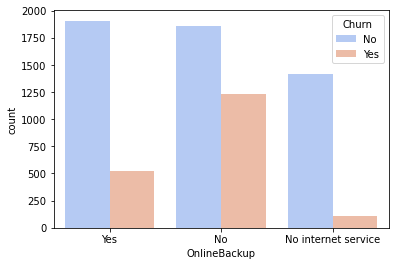

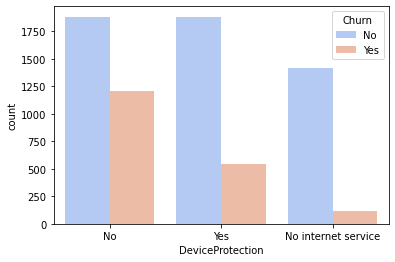

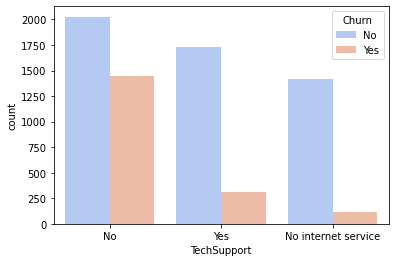

In [22]:
# Services Signed Up for!
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] 
for i in l2:
    plt.figure(i)
    sns.countplot(data=df, x = i, hue='Churn',palette = 'coolwarm')

##### Observations:
1. For PhoneService, despite having no phone service, more customers were retained as compared to the number of customers who dropped the services.
3. A high number of customers have displayed their resistance towards the use of Fiber optic cables for providing the InternetService. On the contrary, from the above graph, customers prefer using DSL for their InternetService!
4. StreamingTV and StreamingMovies display an identical graph. Irrespective of being subscribed to StreamingTV & StreamingMovies, a lot of customers have been churned.
5. When there is no OnlineSecurity, many customers have churned.
6. When there is no OnlineBackup, many customers have churned.
7. When there is no DeviceProtection, many customers have churned and
8. when there is less TechSupport, many customers have churned

#### Group 2: Services Subscribed by the Customer  wrt only customers likely to churn(churn == yes/1)

In [23]:
phoneservice = new_df[new_df['Churn'] == 1]['PhoneService'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # No - Yes

multiplelines = new_df[new_df['Churn'] == 1]['MultipleLines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # No - No Phone Service - Yes 

internetservice = new_df[new_df['Churn'] == 1]['InternetService'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # DSL - Fiber Optic - No 

streamingtv = new_df[new_df['Churn'] == 1]['StreamingTV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] # No - No Internet Service - Yes 

streamingmovies = new_df[new_df['Churn'] == 1]['StreamingMovies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No - No Internet Service - Yes

onlinesecurity = new_df[new_df['Churn'] == 1]['OnlineSecurity'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] # No - No Internet Service - Yes 

onlinebackup =new_df[new_df['Churn'] == 1]['OnlineBackup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No - No Internet Service - Yes 

deviceprotection = new_df[new_df['Churn'] == 1]['DeviceProtection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] # No - No Internet Service - Yes 

techsupport = new_df[new_df['Churn'] == 1]['TechSupport'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] # No - No Internet Service - Yes 

Text(0.5, 1.0, 'TechSupport')

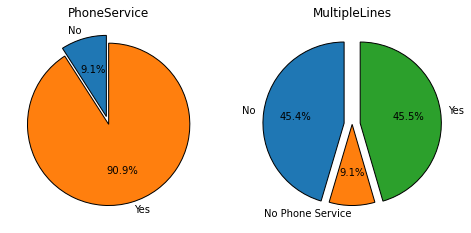

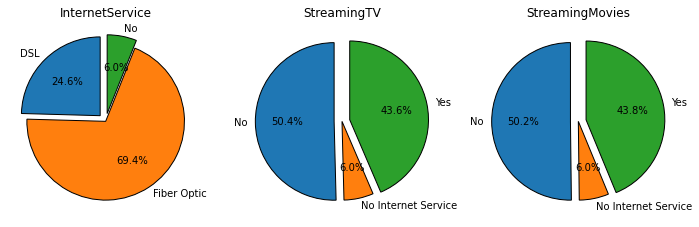

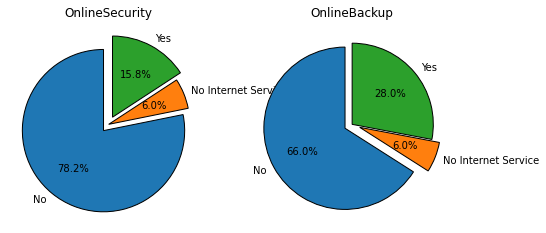

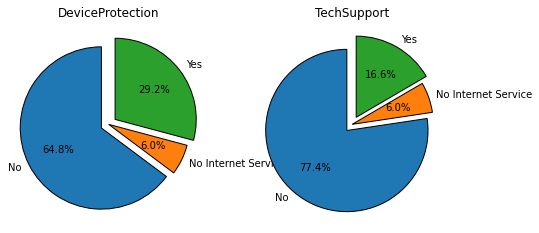

In [24]:
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PhoneService')

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['No','No Phone Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines')

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['DSL', 'Fiber Optic','No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService')

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV')

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies')

ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(onlinesecurity,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity')

plt.subplot(1,2,2)
plt.pie(onlinebackup,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup')

ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))
plt.subplot(1,2,1)
plt.pie(deviceprotection,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection')

plt.subplot(1,2,2)
plt.pie(techsupport,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport')

##### Observations:
1. Despite providing PhoneService, a high percentage of customers have switched!
2. Similarly, availability of MultipleLines did not matter, as customer unsubscription was carried out regardless!
3. For StreamingTV & StreamingMovies, customers without these services definitely cancelled their subscription, however an average of 43.7% of customers switched despite consuming the streaming content.
4. Above pie charts stress out the significance of providing OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport as an average of 71.6% customers cutoff their services due to lack of these features!

#### Group 3 : Payment Information wrt Churn
Contract, PaperlessBilling, PaymentMethod 

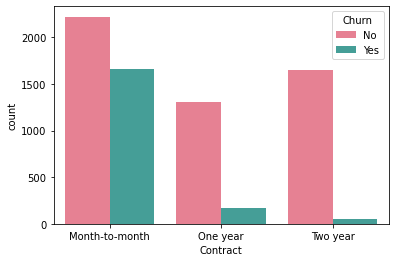

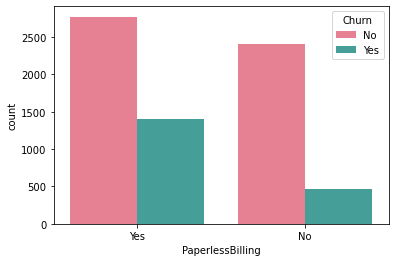

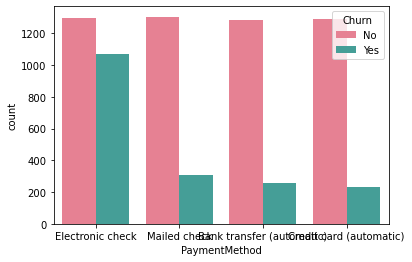

In [25]:
# Payment Information
l3 = ['Contract','PaperlessBilling','PaymentMethod']
for i in l3:
    plt.figure(i)  
    sns.countplot(data=df, x = i, hue='Churn',palette = 'husl')

##### Observation:
1. Customer churning for a Month-to-Month based Contract is quite high. This is probably because the customers are testing out the varied services available to them,hence month service is tested out!
2. PaperlessBilling displays a high number of customers being churned out. This is probably because of some payment issue.
3. Customers clearly resented the Electronic check PaymentMethod. Company definitely needs to either drop Electronic check method or make it hassle-free and user-friendly.

#### Group 3 : Payment Information  wrt only customers likely to churn(churn == yes/1)
Contract, PaperlessBilling, PaymentMethod 

In [26]:
contract = new_df[new_df['Churn'] == 1]['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month - One year - Two year

paperlessbilling = new_df[new_df['Churn'] == 1]['PaperlessBilling'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # No - Yes 

paymentmethod = new_df[new_df['Churn'] == 1]['PaymentMethod'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100, 
            paymentmethod[2] / sum(paymentmethod) * 100, paymentmethod[3] / sum(paymentmethod) * 100] 
            # Bank Transfer (automatic) - Credit Card (automatic) - Electronic check - Mailed check

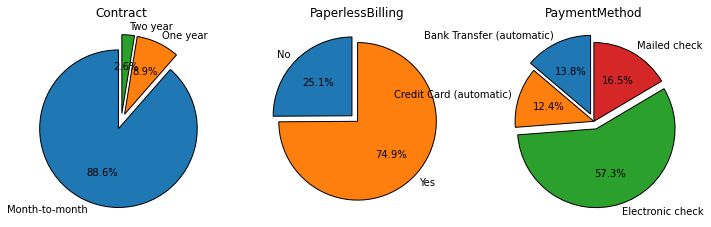

In [27]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(contract,labels = ['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract');

plt.subplot(1,3,2)
plt.pie(paperlessbilling,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaperlessBilling');

plt.subplot(1,3,3)
plt.pie(paymentmethod,labels = ['Bank Transfer (automatic)','Credit Card (automatic)','Electronic check','Mailed check'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaymentMethod');

##### Observation:
1. Month-to-Month Contract duration has the dominating share when it comes churning with a massive 88.6% customers!
2. PaperlessBilling does not seemed to be appreciated by the customers!
3. Electronic check definitely needs to be sorted as it accounts for 57.3% of churn. It is then followed by Mailed check, Bank Transfer (automatic) & Credit Card (automatic)!